In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from pathlib import Path

def create_image_dataset(data_folder):
    """
    Create a pandas DataFrame with image paths and labels from subfolders.
    
    Parameters:
    data_folder (str): Path to the main data folder containing subfolders with images
    
    Returns:
    pandas.DataFrame: DataFrame with columns 'image_path' and 'label'
    """
    image_paths = []
    labels = []
    
    # Get the absolute path of the data folder
    data_path = Path(data_folder)
    
    # Iterate through each subfolder (label)
    for label_folder in data_path.iterdir():
        if label_folder.is_dir():
            label_name = label_folder.name
            
            # Get all image files in the subfolder
            for image_file in label_folder.iterdir():
                if image_file.is_file() and image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
                    image_paths.append(str(image_file.absolute()))
                    labels.append(label_name)
    
    # Create DataFrame
    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels
    })
    
    return df

In [3]:
# Example usage
data_folder = '/Users/mohamedaminemrabet/Documents/Confidentiel/Pandore-test/data'
df = create_image_dataset(data_folder)
print("Dataset created successfully!")
print(f"Total images: {len(df)}")
print(f"Labels: {df['label'].unique()}")
print("\nFirst few rows:")
print(df.head())

Dataset created successfully!
Total images: 6
Labels: ['permit' 'cin']

First few rows:
                                          image_path   label
0  /Users/mohamedaminemrabet/Documents/Confidenti...  permit
1  /Users/mohamedaminemrabet/Documents/Confidenti...  permit
2  /Users/mohamedaminemrabet/Documents/Confidenti...  permit
3  /Users/mohamedaminemrabet/Documents/Confidenti...     cin
4  /Users/mohamedaminemrabet/Documents/Confidenti...     cin


In [4]:
# Display dataset information
print("Dataset Summary:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nLabel distribution:")
print(df['label'].value_counts())
print(f"\nSample of the dataset:")
print(df)


Dataset Summary:
Shape: (6, 2)
Columns: ['image_path', 'label']

Label distribution:
label
permit    3
cin       3
Name: count, dtype: int64

Sample of the dataset:
                                          image_path   label
0  /Users/mohamedaminemrabet/Documents/Confidenti...  permit
1  /Users/mohamedaminemrabet/Documents/Confidenti...  permit
2  /Users/mohamedaminemrabet/Documents/Confidenti...  permit
3  /Users/mohamedaminemrabet/Documents/Confidenti...     cin
4  /Users/mohamedaminemrabet/Documents/Confidenti...     cin
5  /Users/mohamedaminemrabet/Documents/Confidenti...     cin


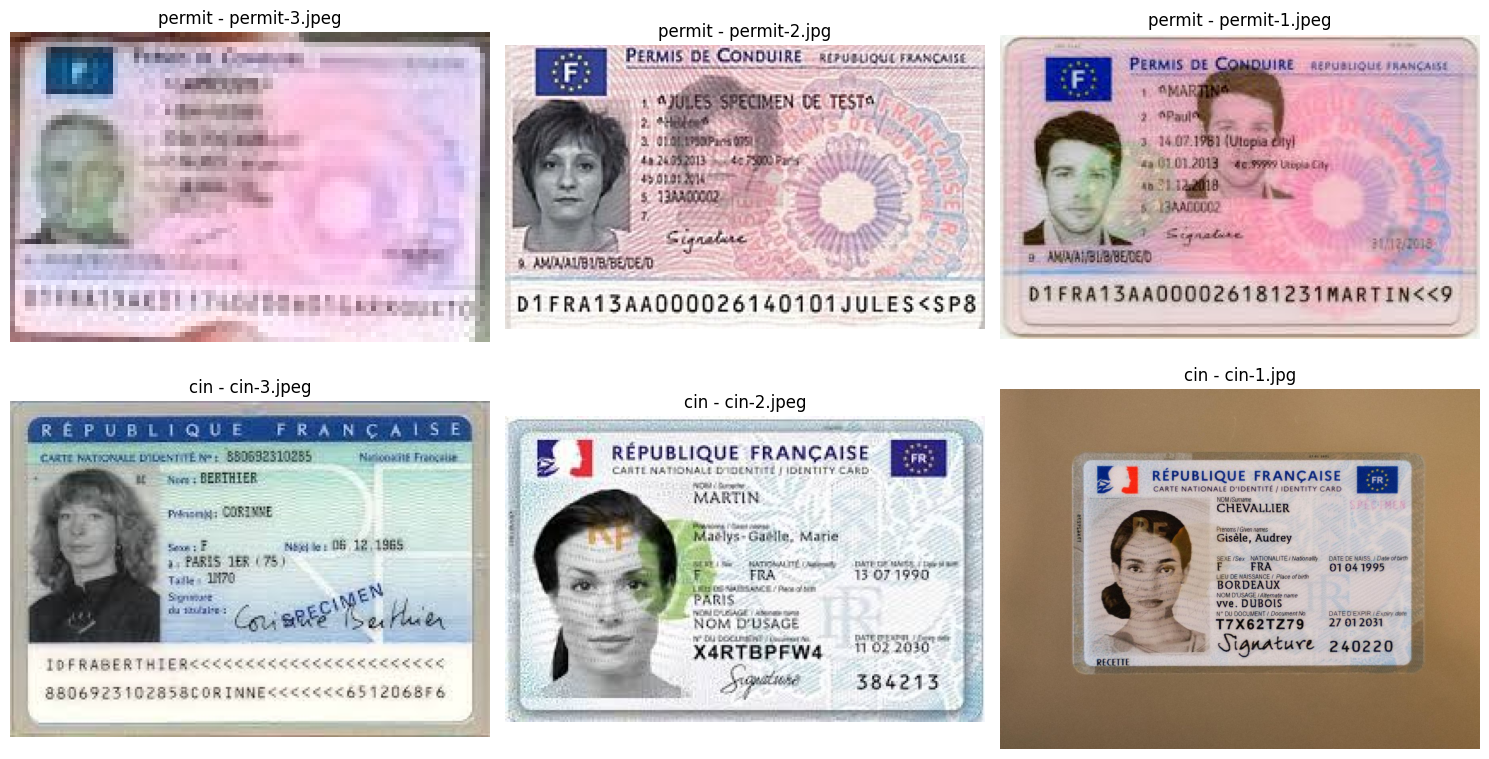

In [5]:
from PIL import Image

def display_sample_images(df, n_samples=3):
    """
    Display sample images from the dataset.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with image paths and labels
    n_samples (int): Number of samples to display per label
    """
    fig, axes = plt.subplots(2, n_samples, figsize=(15, 8))
    axes = axes.ravel()
    
    sample_idx = 0
    for label in df['label'].unique():
        label_samples = df[df['label'] == label].head(n_samples)
        
        for idx, (_, row) in enumerate(label_samples.iterrows()):
            try:
                img = Image.open(row['image_path'])
                axes[sample_idx].imshow(img)
                axes[sample_idx].set_title(f"{row['label']} - {Path(row['image_path']).name}")
                axes[sample_idx].axis('off')
                sample_idx += 1
            except Exception as e:
                print(f"Error loading image {row['image_path']}: {e}")
    
    # Hide unused subplots
    for idx in range(sample_idx, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df)


In [6]:
def analyze_pixel_distribution(image_path, title="Pixel Distribution"):
    """
    Analyze and display the pixel distribution of an image.
    
    Parameters:
    image_path (str): Path to the image file
    title (str): Title for the plot
    """
    # Load the image
    img = Image.open(image_path)
    
    # Convert to RGB if necessary
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Reshape to get all pixels
    pixels = img_array.reshape(-1, 3)
    
    # Create a figure with subplots for RGB channels
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Display the original image
    axes[0, 0].imshow(img)
    axes[0, 0].set_title(f"Original Image\n{Path(image_path).name}")
    axes[0, 0].axis('off')
    
    # Analyze each RGB channel
    colors = ['Red', 'Green', 'Blue']
    for i, color in enumerate(colors):
        channel_data = pixels[:, i]
        
        # Create histogram
        axes[0, 1].hist(channel_data, bins=256, alpha=0.7, 
                       color=color.lower(), label=f'{color} Channel')
    
    axes[0, 1].set_title('RGB Channel Distribution')
    axes[0, 1].set_xlabel('Pixel Intensity (0-255)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Analyze color distribution (dominant colors)
    # Sample a subset of pixels for efficiency
    sample_pixels = pixels[::100]  # Sample every 100th pixel
    
    # Count unique colors (approximate by rounding to nearest 10)
    rounded_pixels = (sample_pixels // 10) * 10
    unique_colors, counts = np.unique(rounded_pixels, axis=0, return_counts=True)
    
    # Sort by frequency
    sorted_indices = np.argsort(counts)[::-1]
    top_colors = unique_colors[sorted_indices][:20]  # Top 20 colors
    top_counts = counts[sorted_indices][:20]
    
    # Create color bars
    color_bars = [f"RGB({r},{g},{b})" for r, g, b in top_colors]
    
    axes[1, 0].barh(range(len(color_bars)), top_counts)
    axes[1, 0].set_yticks(range(len(color_bars)))
    axes[1, 0].set_yticklabels(color_bars, fontsize=8)
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].set_title('Top 20 Dominant Colors')
    axes[1, 0].invert_yaxis()
    
    # Create a color palette visualization
    color_palette = np.array(top_colors).reshape(1, -1, 3)
    axes[1, 1].imshow(color_palette, aspect='auto')
    axes[1, 1].set_title('Color Palette (Top 20)')
    axes[1, 1].set_xticks(range(0, len(top_colors), 2))
    axes[1, 1].set_xticklabels([f"RGB({r},{g},{b})" for r, g, b in top_colors[::2]], 
                               rotation=45, ha='right', fontsize=8)
    axes[1, 1].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nImage Statistics for {Path(image_path).name}:")
    print(f"Image size: {img.size}")
    print(f"Mode: {img.mode}")
    print(f"Total pixels: {len(pixels)}")
    print(f"Mean RGB values: R={pixels[:, 0].mean():.1f}, G={pixels[:, 1].mean():.1f}, B={pixels[:, 2].mean():.1f}")
    print(f"Std RGB values: R={pixels[:, 0].std():.1f}, G={pixels[:, 1].std():.1f}, B={pixels[:, 2].std():.1f}")


Analyzing CIN image...


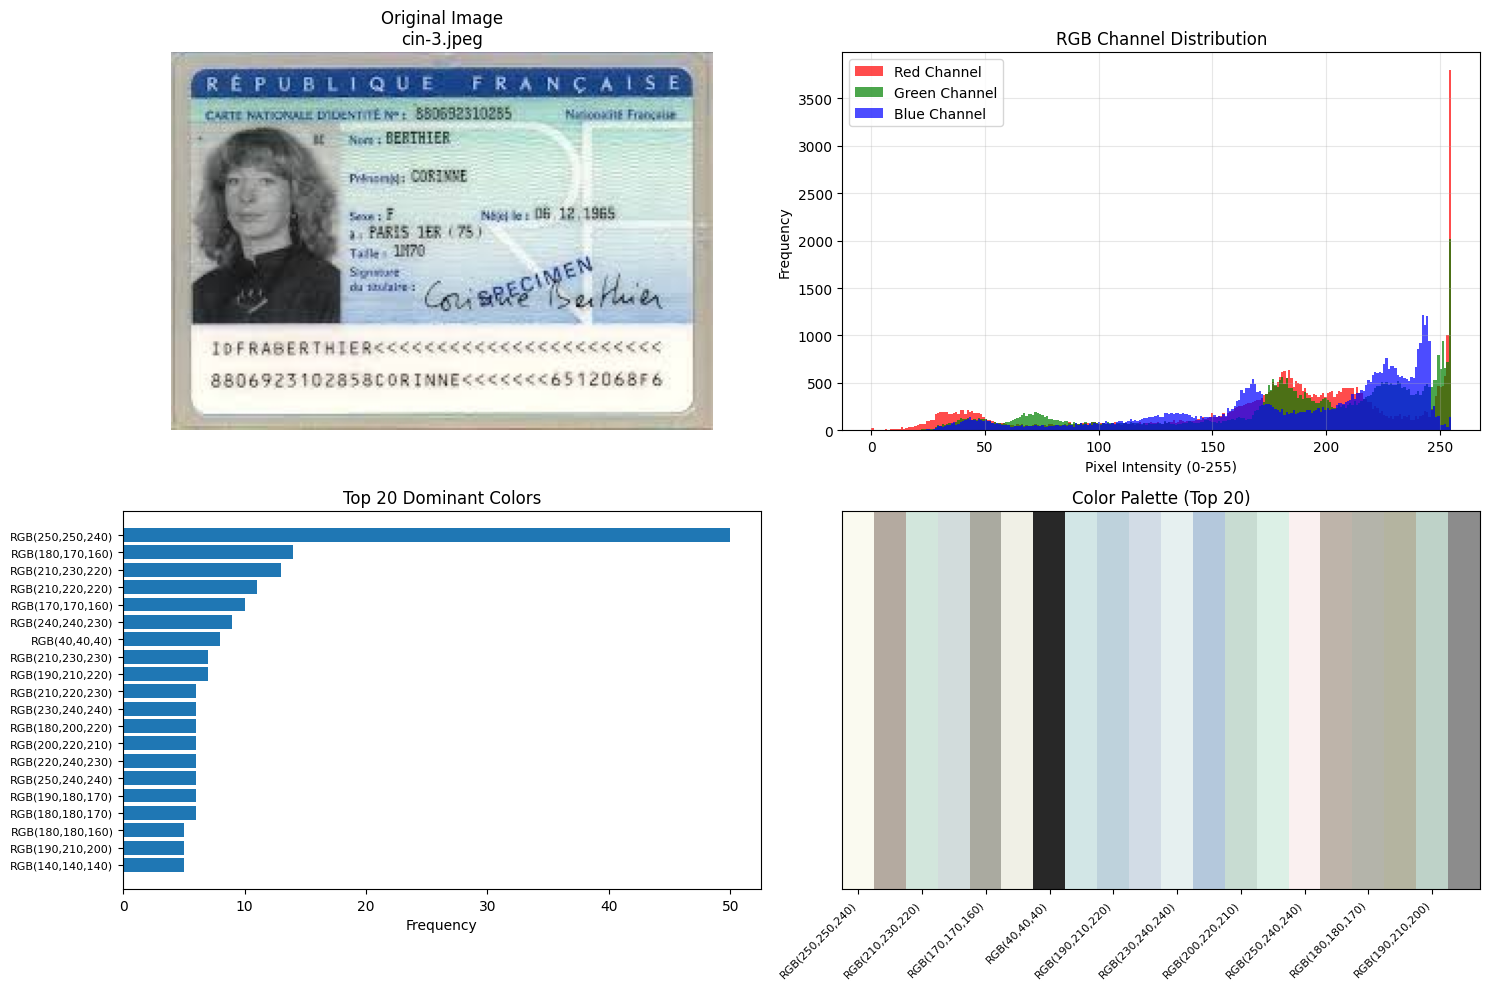


Image Statistics for cin-3.jpeg:
Image size: (269, 188)
Mode: RGB
Total pixels: 50572
Mean RGB values: R=173.6, G=184.7, B=186.5
Std RGB values: R=66.0, G=62.5, B=56.1


In [10]:
cin_image = df[df['label'] == 'cin']['image_path'].iloc[0]
permit_image = df[df['label'] == 'permit']['image_path'].iloc[1]

print("Analyzing CIN image...")
analyze_pixel_distribution(cin_image, "CIN Image Analysis")


Analyzing PERMIT image...


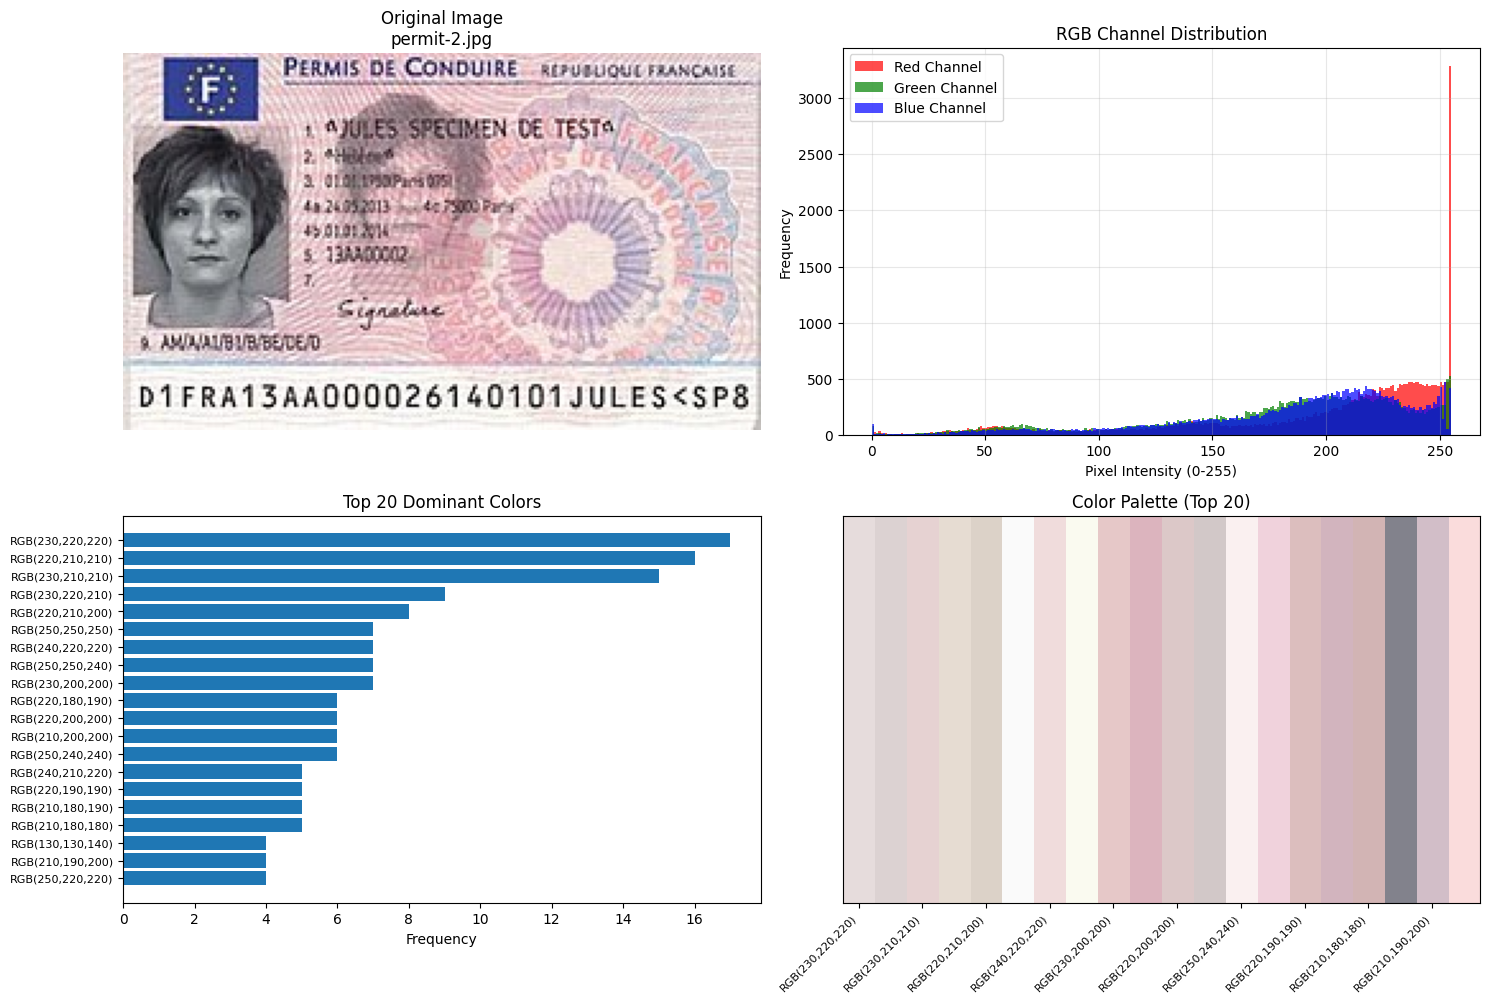


Image Statistics for permit-2.jpg:
Image size: (250, 148)
Mode: RGB
Total pixels: 37000
Mean RGB values: R=197.8, G=179.7, B=185.6
Std RGB values: R=59.9, G=56.8, B=53.2


In [11]:
print("\n" + "="*60)
print("Analyzing PERMIT image...")
analyze_pixel_distribution(permit_image, "PERMIT Image Analysis")


In [12]:
def extract_color_features(image_path, n_colors=10):
    """
    Extract dominant color features from an image.
    
    Parameters:
    image_path (str): Path to the image file
    n_colors (int): Number of dominant colors to extract
    
    Returns:
    dict: Dictionary containing color features
    """
    # Load the image
    img = Image.open(image_path)
    
    # Convert to RGB if necessary
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Convert to numpy array
    img_array = np.array(img)
    pixels = img_array.reshape(-1, 3)
    
    # Sample pixels for efficiency
    sample_pixels = pixels[::50]  # Sample every 50th pixel
    
    # Round to nearest 20 to group similar colors
    rounded_pixels = (sample_pixels // 20) * 20
    unique_colors, counts = np.unique(rounded_pixels, axis=0, return_counts=True)
    
    # Sort by frequency and get top colors
    sorted_indices = np.argsort(counts)[::-1]
    top_colors = unique_colors[sorted_indices][:n_colors]
    top_counts = counts[sorted_indices][:n_colors]
    
    # Calculate color ratios
    total_pixels = len(sample_pixels)
    color_ratios = top_counts / total_pixels
    
    # Calculate mean RGB values
    mean_rgb = np.mean(pixels, axis=0)
    
    # Calculate RGB standard deviations
    std_rgb = np.std(pixels, axis=0)
    
    # Calculate color diversity (entropy)
    color_entropy = -np.sum(color_ratios * np.log2(color_ratios + 1e-10))
    
    return {
        'top_colors': top_colors,
        'color_ratios': color_ratios,
        'mean_rgb': mean_rgb,
        'std_rgb': std_rgb,
        'color_entropy': color_entropy,
        'dominant_color': top_colors[0] if len(top_colors) > 0 else np.array([0, 0, 0])
    }

In [13]:
# Extract features from all existing images
print("Extracting color features from existing images...")
cin_features = []
permit_features = []

for _, row in df.iterrows():
    features = extract_color_features(row['image_path'])
    if row['label'] == 'cin':
        cin_features.append(features)
    else:
        permit_features.append(features)

print(f"Extracted features from {len(cin_features)} CIN images and {len(permit_features)} permit images")


Extracting color features from existing images...
Extracted features from 3 CIN images and 3 permit images


In [14]:
def create_color_classifier(cin_features, permit_features):
    """
    Create a color-based classifier using the extracted features.
    
    Parameters:
    cin_features (list): List of color features from CIN images
    permit_features (list): List of color features from permit images
    
    Returns:
    dict: Classifier with learned patterns
    """
    # Calculate average features for each class
    cin_mean_rgb = np.mean([f['mean_rgb'] for f in cin_features], axis=0)
    cin_std_rgb = np.mean([f['std_rgb'] for f in cin_features], axis=0)
    cin_mean_entropy = np.mean([f['color_entropy'] for f in cin_features])
    
    permit_mean_rgb = np.mean([f['mean_rgb'] for f in permit_features], axis=0)
    permit_std_rgb = np.mean([f['std_rgb'] for f in permit_features], axis=0)
    permit_mean_entropy = np.mean([f['color_entropy'] for f in permit_features])
    
    # Get common dominant colors for each class
    cin_dominant_colors = []
    permit_dominant_colors = []
    
    for f in cin_features:
        cin_dominant_colors.extend(f['top_colors'][:3])  # Top 3 colors
    
    for f in permit_features:
        permit_dominant_colors.extend(f['top_colors'][:3])  # Top 3 colors
    
    # Find unique dominant colors for each class
    cin_unique_colors = np.unique(np.array(cin_dominant_colors), axis=0)
    permit_unique_colors = np.unique(np.array(permit_dominant_colors), axis=0)
    
    classifier = {
        'cin': {
            'mean_rgb': cin_mean_rgb,
            'std_rgb': cin_std_rgb,
            'mean_entropy': cin_mean_entropy,
            'dominant_colors': cin_unique_colors
        },
        'permit': {
            'mean_rgb': permit_mean_rgb,
            'std_rgb': permit_std_rgb,
            'mean_entropy': permit_mean_entropy,
            'dominant_colors': permit_unique_colors
        }
    }
    
    return classifier

In [15]:
# Create the classifier
classifier = create_color_classifier(cin_features, permit_features)

print("Color-based classifier created!")
print("\nCIN Class Characteristics:")
print(f"Mean RGB: {classifier['cin']['mean_rgb']}")
print(f"Mean Entropy: {classifier['cin']['mean_entropy']:.3f}")
print(f"Number of dominant colors: {len(classifier['cin']['dominant_colors'])}")

print("\nPermit Class Characteristics:")
print(f"Mean RGB: {classifier['permit']['mean_rgb']}")
print(f"Mean Entropy: {classifier['permit']['mean_entropy']:.3f}")
print(f"Number of dominant colors: {len(classifier['permit']['dominant_colors'])}")

Color-based classifier created!

CIN Class Characteristics:
Mean RGB: [176.00443113 173.97809475 168.84676027]
Mean Entropy: 2.320
Number of dominant colors: 8

Permit Class Characteristics:
Mean RGB: [201.13082181 175.46788798 187.27491658]
Mean Entropy: 2.094
Number of dominant colors: 8


In [16]:
def classify_image(image_path, classifier):
    """
    Classify an image as CIN or permit based on color features.
    
    Parameters:
    image_path (str): Path to the image file
    classifier (dict): Trained color classifier
    
    Returns:
    tuple: (predicted_label, confidence_score, detailed_scores)
    """
    # Extract features from the image
    features = extract_color_features(image_path)
    
    # Calculate similarity scores for each class
    cin_score = 0
    permit_score = 0
    
    # RGB mean similarity (lower distance = higher similarity)
    cin_rgb_distance = np.linalg.norm(features['mean_rgb'] - classifier['cin']['mean_rgb'])
    permit_rgb_distance = np.linalg.norm(features['mean_rgb'] - classifier['permit']['mean_rgb'])
    
    # Normalize distances (invert so higher = better)
    cin_score += 1 / (1 + cin_rgb_distance)
    permit_score += 1 / (1 + permit_rgb_distance)
    
    # Entropy similarity
    cin_entropy_diff = abs(features['color_entropy'] - classifier['cin']['mean_entropy'])
    permit_entropy_diff = abs(features['color_entropy'] - classifier['permit']['mean_entropy'])
    
    cin_score += 1 / (1 + cin_entropy_diff)
    permit_score += 1 / (1 + permit_entropy_diff)
    
    # Dominant color similarity
    cin_color_matches = 0
    permit_color_matches = 0
    
    for dominant_color in features['top_colors'][:5]:  # Check top 5 colors
        # Check similarity with CIN dominant colors
        for cin_color in classifier['cin']['dominant_colors']:
            if np.linalg.norm(dominant_color - cin_color) < 30:  # Threshold for color similarity
                cin_color_matches += 1
                break
        
        # Check similarity with permit dominant colors
        for permit_color in classifier['permit']['dominant_colors']:
            if np.linalg.norm(dominant_color - permit_color) < 30:  # Threshold for color similarity
                permit_color_matches += 1
                break
    
    cin_score += cin_color_matches * 0.2
    permit_score += permit_color_matches * 0.2
    
    # Determine prediction
    if cin_score > permit_score:
        predicted_label = 'cin'
        confidence = cin_score / (cin_score + permit_score)
    else:
        predicted_label = 'permit'
        confidence = permit_score / (cin_score + permit_score)
    
    detailed_scores = {
        'cin_score': cin_score,
        'permit_score': permit_score,
        'cin_rgb_distance': cin_rgb_distance,
        'permit_rgb_distance': permit_rgb_distance,
        'cin_color_matches': cin_color_matches,
        'permit_color_matches': permit_color_matches
    }
    
    return predicted_label, confidence, detailed_scores

In [17]:
# Test the classifier on existing images
print("Testing classifier on existing images...")
print("=" * 60)

correct_predictions = 0
total_predictions = len(df)

for _, row in df.iterrows():
    predicted_label, confidence, scores = classify_image(row['image_path'], classifier)
    actual_label = row['label']
    is_correct = predicted_label == actual_label
    
    if is_correct:
        correct_predictions += 1
    
    print(f"Image: {Path(row['image_path']).name}")
    print(f"Actual: {actual_label}, Predicted: {predicted_label}, Confidence: {confidence:.3f}")
    print(f"CIN Score: {scores['cin_score']:.3f}, Permit Score: {scores['permit_score']:.3f}")
    print(f"Result: {'✓ CORRECT' if is_correct else '✗ INCORRECT'}")
    print("-" * 40)

accuracy = correct_predictions / total_predictions
print(f"\nOverall Accuracy: {accuracy:.2%} ({correct_predictions}/{total_predictions})")


Testing classifier on existing images...
Image: permit-3.jpeg
Actual: permit, Predicted: permit, Confidence: 0.691
CIN Score: 0.835, Permit Score: 1.864
Result: ✓ CORRECT
----------------------------------------
Image: permit-2.jpg
Actual: permit, Predicted: permit, Confidence: 0.589
CIN Score: 1.477, Permit Score: 2.113
Result: ✓ CORRECT
----------------------------------------
Image: permit-1.jpeg
Actual: permit, Predicted: permit, Confidence: 0.641
CIN Score: 1.030, Permit Score: 1.838
Result: ✓ CORRECT
----------------------------------------
Image: cin-3.jpeg
Actual: cin, Predicted: cin, Confidence: 0.545
CIN Score: 1.593, Permit Score: 1.332
Result: ✓ CORRECT
----------------------------------------
Image: cin-2.jpeg
Actual: cin, Predicted: permit, Confidence: 0.507
CIN Score: 1.741, Permit Score: 1.794
Result: ✗ INCORRECT
----------------------------------------
Image: cin-1.jpg
Actual: cin, Predicted: cin, Confidence: 0.645
CIN Score: 1.612, Permit Score: 0.886
Result: ✓ CORREC

In [18]:
def classify_and_add_image(image_path, classifier, dataset_df, confidence_threshold=0.6):
    """
    Classify a new image and add it to the dataset if confidence is above threshold.
    
    Parameters:
    image_path (str): Path to the new image file
    classifier (dict): Trained color classifier
    dataset_df (pandas.DataFrame): Current dataset DataFrame
    confidence_threshold (float): Minimum confidence required to add to dataset
    
    Returns:
    tuple: (updated_dataframe, classification_result, was_added)
    """
    # Classify the image
    predicted_label, confidence, scores = classify_image(image_path, classifier)
    
    classification_result = {
        'image_path': image_path,
        'predicted_label': predicted_label,
        'confidence': confidence,
        'scores': scores
    }
    
    was_added = False
    
    # Check if confidence is above threshold
    if confidence >= confidence_threshold:
        # Add to dataset
        new_row = pd.DataFrame({
            'image_path': [image_path],
            'label': [predicted_label]
        })
        
        updated_df = pd.concat([dataset_df, new_row], ignore_index=True)
        was_added = True
        
        print(f"✓ Image added to dataset as '{predicted_label}' (confidence: {confidence:.3f})")
    else:
        updated_df = dataset_df.copy()
        print(f"✗ Image NOT added - confidence too low: {confidence:.3f} < {confidence_threshold}")
        print(f"  Predicted: {predicted_label}, but not confident enough")
    
    return updated_df, classification_result, was_added

def batch_classify_and_add_images(image_folder, classifier, dataset_df, confidence_threshold=0.6):
    """
    Classify and add multiple images from a folder.
    
    Parameters:
    image_folder (str): Path to folder containing new images
    classifier (dict): Trained color classifier
    dataset_df (pandas.DataFrame): Current dataset DataFrame
    confidence_threshold (float): Minimum confidence required to add to dataset
    
    Returns:
    tuple: (updated_dataframe, classification_results)
    """
    image_folder_path = Path(image_folder)
    updated_df = dataset_df.copy()
    classification_results = []
    
    # Find all image files in the folder
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    image_files = []
    
    for ext in image_extensions:
        image_files.extend(image_folder_path.glob(f"*{ext}"))
        image_files.extend(image_folder_path.glob(f"*{ext.upper()}"))
    
    print(f"Found {len(image_files)} images in {image_folder}")
    print("=" * 60)
    
    for image_file in image_files:
        print(f"\nProcessing: {image_file.name}")
        updated_df, result, was_added = classify_and_add_image(
            str(image_file), classifier, updated_df, confidence_threshold
        )
        classification_results.append(result)
    
    return updated_df, classification_results

# Example usage functions
def add_single_image(image_path, confidence_threshold=0.6):
    """Helper function to add a single image to the dataset."""
    global df
    df, result, was_added = classify_and_add_image(image_path, classifier, df, confidence_threshold)
    return df, result, was_added

def add_images_from_folder(folder_path, confidence_threshold=0.6):
    """Helper function to add images from a folder to the dataset."""
    global df
    df, results = batch_classify_and_add_images(folder_path, classifier, df, confidence_threshold)
    return df, results

print("Classification system ready!")
print("\nUsage examples:")
print("1. Add single image: df, result, added = add_single_image('/path/to/image.jpg')")
print("2. Add from folder: df, results = add_images_from_folder('/path/to/folder')")
print("3. Adjust confidence: df, result, added = add_single_image('/path/to/image.jpg', confidence_threshold=0.7)")


Classification system ready!

Usage examples:
1. Add single image: df, result, added = add_single_image('/path/to/image.jpg')
2. Add from folder: df, results = add_images_from_folder('/path/to/folder')
3. Adjust confidence: df, result, added = add_single_image('/path/to/image.jpg', confidence_threshold=0.7)


In [19]:
def plot_pixel_distribution(image_path, channel='all'):
    """
    Plot a bar chart showing pixel distribution from 0 to 255 for a chosen image.
    
    Parameters:
    image_path (str): Path to the image file
    channel (str): 'all', 'red', 'green', 'blue', or 'gray' - which channel to analyze
    """
    # Load the image
    img = Image.open(image_path)
    
    # Convert to RGB if necessary
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Create histogram bins (0 to 255)
    bins = np.arange(0, 256)
    
    if channel == 'all':
        # Plot all RGB channels
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Original image
        axes[0, 0].imshow(img)
        axes[0, 0].set_title(f"Original Image\n{Path(image_path).name}")
        axes[0, 0].axis('off')
        
        # RGB channels
        colors = ['red', 'green', 'blue']
        channel_names = ['Red', 'Green', 'Blue']
        
        for i, (color, name) in enumerate(zip(colors, channel_names)):
            channel_data = img_array[:, :, i].flatten()
            hist, _ = np.histogram(channel_data, bins=bins)
            
            axes[0, 1].bar(bins[:-1], hist, alpha=0.7, color=color, label=f'{name} Channel')
        
        axes[0, 1].set_title('RGB Channel Distribution')
        axes[0, 1].set_xlabel('Pixel Intensity (0-255)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Individual channel histograms
        for i, (color, name) in enumerate(zip(colors, channel_names)):
            channel_data = img_array[:, :, i].flatten()
            hist, _ = np.histogram(channel_data, bins=bins)
            
            axes[1, i].bar(bins[:-1], hist, color=color, alpha=0.8)
            axes[1, i].set_title(f'{name} Channel Distribution')
            axes[1, i].set_xlabel('Pixel Intensity (0-255)')
            axes[1, i].set_ylabel('Frequency')
            axes[1, i].grid(True, alpha=0.3)
        
    elif channel == 'gray':
        # Convert to grayscale
        gray_img = img.convert('L')
        gray_array = np.array(gray_img)
        gray_data = gray_array.flatten()
        
        hist, _ = np.histogram(gray_data, bins=bins)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Original image
        axes[0].imshow(gray_img, cmap='gray')
        axes[0].set_title(f"Grayscale Image\n{Path(image_path).name}")
        axes[0].axis('off')
        
        # Histogram
        axes[1].bar(bins[:-1], hist, color='gray', alpha=0.8)
        axes[1].set_title('Grayscale Pixel Distribution')
        axes[1].set_xlabel('Pixel Intensity (0-255)')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True, alpha=0.3)
        
    else:
        # Single RGB channel
        channel_map = {'red': 0, 'green': 1, 'blue': 2}
        if channel not in channel_map:
            raise ValueError("Channel must be 'all', 'red', 'green', 'blue', or 'gray'")
        
        channel_idx = channel_map[channel]
        channel_data = img_array[:, :, channel_idx].flatten()
        hist, _ = np.histogram(channel_data, bins=bins)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Original image
        axes[0].imshow(img)
        axes[0].set_title(f"Original Image\n{Path(image_path).name}")
        axes[0].axis('off')
        
        # Histogram
        axes[1].bar(bins[:-1], hist, color=channel, alpha=0.8)
        axes[1].set_title(f'{channel.capitalize()} Channel Distribution')
        axes[1].set_xlabel('Pixel Intensity (0-255)')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    if channel == 'all':
        for i, name in enumerate(['Red', 'Green', 'Blue']):
            channel_data = img_array[:, :, i].flatten()
            print(f"{name} Channel - Mean: {channel_data.mean():.1f}, Std: {channel_data.std():.1f}")
    elif channel == 'gray':
        print(f"Grayscale - Mean: {gray_data.mean():.1f}, Std: {gray_data.std():.1f}")
    else:
        channel_data = img_array[:, :, channel_map[channel]].flatten()
        print(f"{channel.capitalize()} Channel - Mean: {channel_data.mean():.1f}, Std: {channel_data.std():.1f}")


In [22]:
def plot_pixel_distribution_fixed(image_path, channel='all'):
    """
    Plot a bar chart showing pixel distribution from 0 to 255 for a chosen image.
    Fixed version with correct subplot indexing.
    
    Parameters:
    image_path (str): Path to the image file
    channel (str): 'all', 'red', 'green', 'blue', or 'gray' - which channel to analyze
    """
    # Load the image
    img = Image.open(image_path)
    
    # Convert to RGB if necessary
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Create histogram bins (0 to 255)
    bins = np.arange(0, 256)
    
    if channel == 'all':
        # Plot all RGB channels - use 2x3 layout for 6 subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        
        # Original image
        axes[0, 0].imshow(img)
        axes[0, 0].set_title(f"Original Image\n{Path(image_path).name}")
        axes[0, 0].axis('off')
        
        # RGB channels combined
        colors = ['red', 'green', 'blue']
        channel_names = ['Red', 'Green', 'Blue']
        
        for i, (color, name) in enumerate(zip(colors, channel_names)):
            channel_data = img_array[:, :, i].flatten()
            hist, _ = np.histogram(channel_data, bins=bins)
            
            axes[0, 1].bar(bins[:-1], hist, alpha=0.7, color=color, label=f'{name} Channel')
        
        axes[0, 1].set_title('RGB Channel Distribution')
        axes[0, 1].set_xlabel('Pixel Intensity (0-255)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Hide the unused subplot
        axes[0, 2].axis('off')
        
        # Individual channel histograms
        for i, (color, name) in enumerate(zip(colors, channel_names)):
            channel_data = img_array[:, :, i].flatten()
            hist, _ = np.histogram(channel_data, bins=bins)
            
            axes[1, i].bar(bins[:-1], hist, color=color, alpha=0.8)
            axes[1, i].set_title(f'{name} Channel Distribution')
            axes[1, i].set_xlabel('Pixel Intensity (0-255)')
            axes[1, i].set_ylabel('Frequency')
            axes[1, i].grid(True, alpha=0.3)
        
    elif channel == 'gray':
        # Convert to grayscale
        gray_img = img.convert('L')
        gray_array = np.array(gray_img)
        gray_data = gray_array.flatten()
        
        hist, _ = np.histogram(gray_data, bins=bins)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Original image
        axes[0].imshow(gray_img, cmap='gray')
        axes[0].set_title(f"Grayscale Image\n{Path(image_path).name}")
        axes[0].axis('off')
        
        # Histogram
        axes[1].bar(bins[:-1], hist, color='gray', alpha=0.8)
        axes[1].set_title('Grayscale Pixel Distribution')
        axes[1].set_xlabel('Pixel Intensity (0-255)')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True, alpha=0.3)
        
    else:
        # Single RGB channel
        channel_map = {'red': 0, 'green': 1, 'blue': 2}
        if channel not in channel_map:
            raise ValueError("Channel must be 'all', 'red', 'green', 'blue', or 'gray'")
        
        channel_idx = channel_map[channel]
        channel_data = img_array[:, :, channel_idx].flatten()
        hist, _ = np.histogram(channel_data, bins=bins)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Original image
        axes[0].imshow(img)
        axes[0].set_title(f"Original Image\n{Path(image_path).name}")
        axes[0].axis('off')
        
        # Histogram
        axes[1].bar(bins[:-1], hist, color=channel, alpha=0.8)
        axes[1].set_title(f'{channel.capitalize()} Channel Distribution')
        axes[1].set_xlabel('Pixel Intensity (0-255)')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    if channel == 'all':
        for i, name in enumerate(['Red', 'Green', 'Blue']):
            channel_data = img_array[:, :, i].flatten()
            print(f"{name} Channel - Mean: {channel_data.mean():.1f}, Std: {channel_data.std():.1f}")
    elif channel == 'gray':
        print(f"Grayscale - Mean: {gray_data.mean():.1f}, Std: {gray_data.std():.1f}")
    else:
        channel_data = img_array[:, :, channel_map[channel]].flatten()
        print(f"{channel.capitalize()} Channel - Mean: {channel_data.mean():.1f}, Std: {channel_data.std():.1f}")


Testing the fixed pixel distribution function...

Analyzing CIN image: cin-3.jpeg


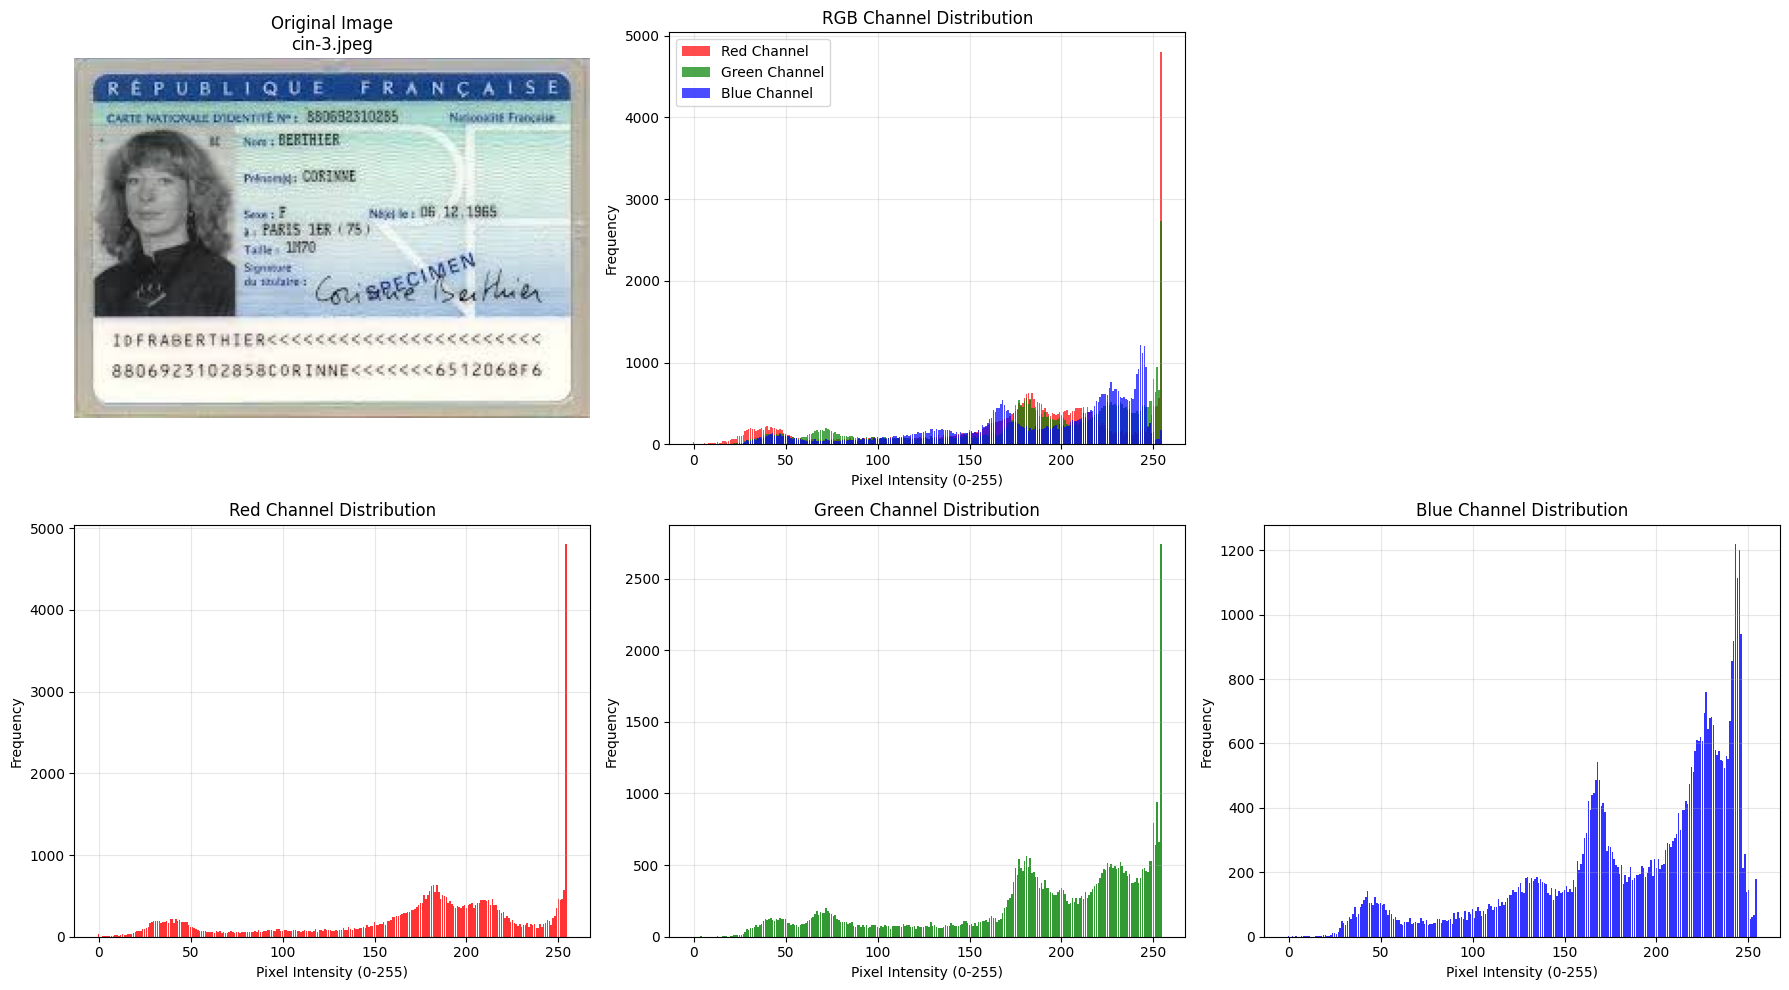

Red Channel - Mean: 173.6, Std: 66.0
Green Channel - Mean: 184.7, Std: 62.5
Blue Channel - Mean: 186.5, Std: 56.1


In [25]:
# Test the fixed function
print("Testing the fixed pixel distribution function...")
print("=" * 50)

# Let's analyze one image from each category
cin_image = df[df['label'] == 'cin']['image_path'].iloc[0]

print(f"\nAnalyzing CIN image: {Path(cin_image).name}")
plot_pixel_distribution_fixed(cin_image, channel='all')


Analyzing PERMIT image: permit-2.jpg


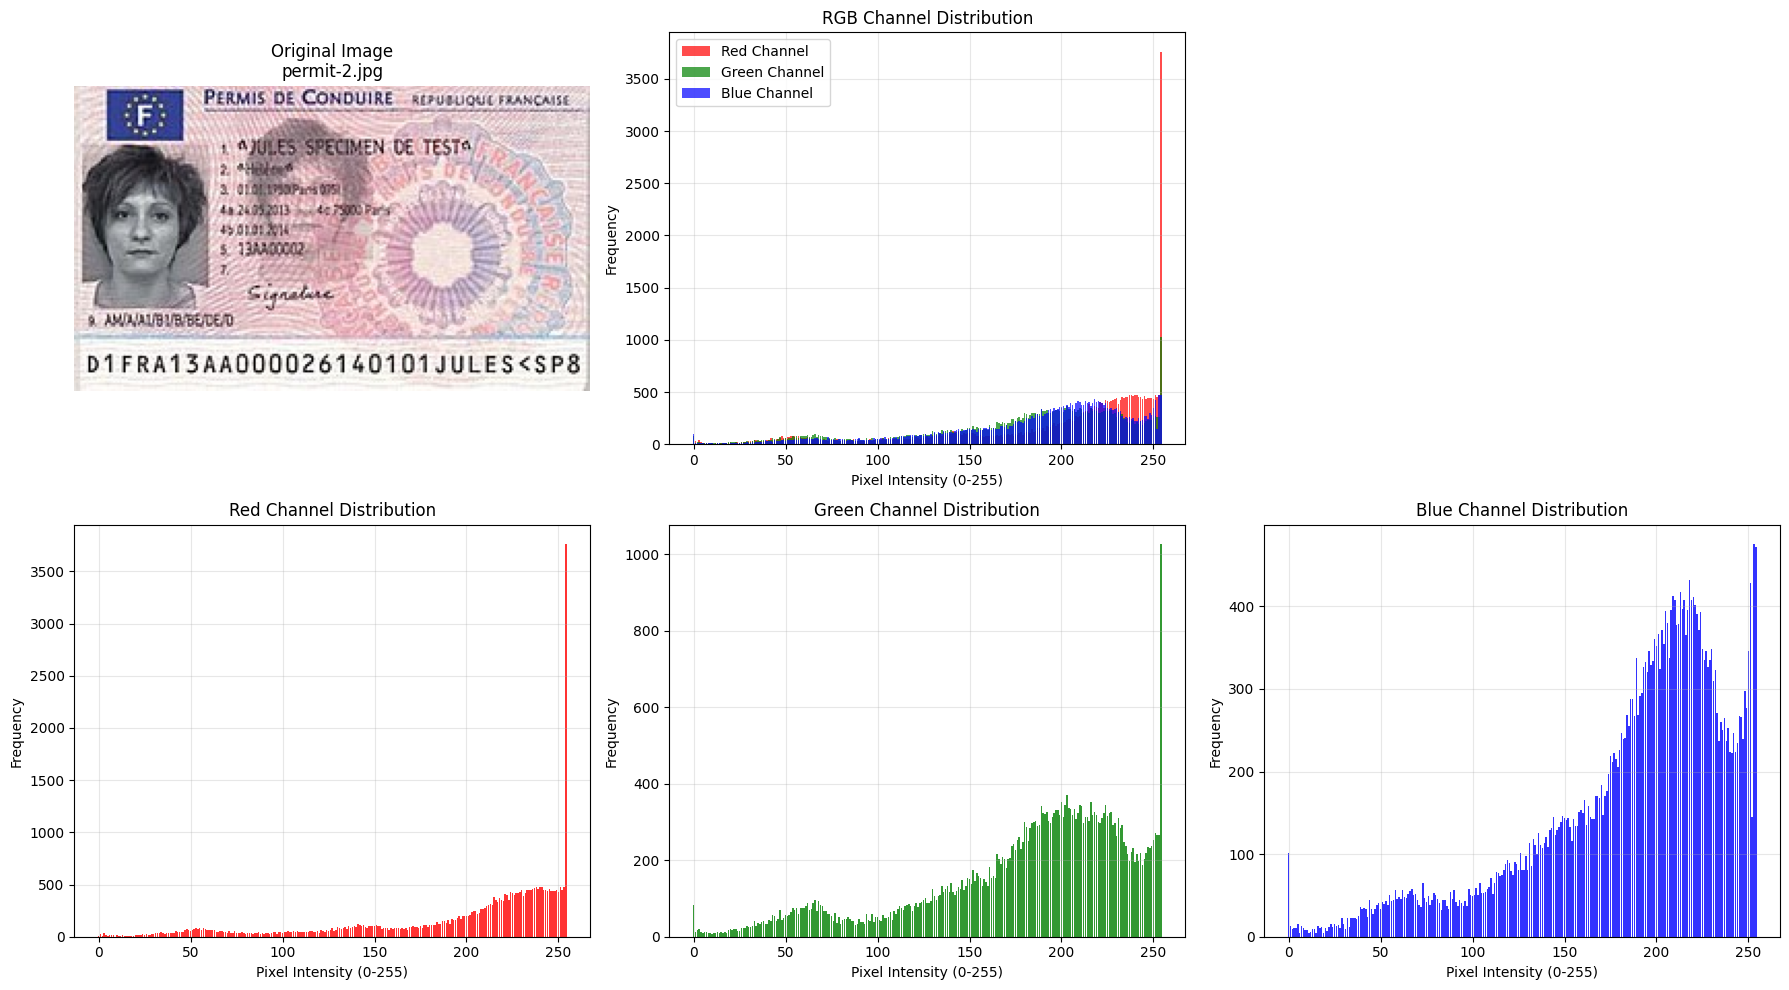

Red Channel - Mean: 197.8, Std: 59.9
Green Channel - Mean: 179.7, Std: 56.8
Blue Channel - Mean: 185.6, Std: 53.2

Fixed function usage examples:
- plot_pixel_distribution_fixed(image_path, channel='all')
- plot_pixel_distribution_fixed(image_path, channel='red')
- plot_pixel_distribution_fixed(image_path, channel='green')
- plot_pixel_distribution_fixed(image_path, channel='blue')
- plot_pixel_distribution_fixed(image_path, channel='gray')


In [26]:
permit_image = df[df['label'] == 'permit']['image_path'].iloc[1]

print(f"\nAnalyzing PERMIT image: {Path(permit_image).name}")
plot_pixel_distribution_fixed(permit_image, channel='all')

print("\n" + "="*60)
print("Fixed function usage examples:")
print("- plot_pixel_distribution_fixed(image_path, channel='all')")
print("- plot_pixel_distribution_fixed(image_path, channel='red')")
print("- plot_pixel_distribution_fixed(image_path, channel='green')")
print("- plot_pixel_distribution_fixed(image_path, channel='blue')")
print("- plot_pixel_distribution_fixed(image_path, channel='gray')")
